# Titanic Exploratory Data analysis and Machine Learning Project

## Step 1: Import Libraries

In [330]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Step 2: Load Data

In [331]:
# Load the Titanic dataset
data = pd.read_csv('./data/train.csv')

In [332]:
# Display the first few rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [333]:
# Display the last few rows
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0.0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q
891,892,NaN,3,"Zaman, Mr. Hasan",Male,42.0,0,2,36278,8.25,NaN,S
892,893,NaN,3,"Maahi, Mrs. Faria",Female,14.0,0,1,36279,5.25,NaN,Q


## Step 3: Initial Data Exploration

In [334]:
# Check the shape of the data
data.shape

(893, 12)

In [335]:
# Check for info about the data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  893 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       893 non-null    int64  
 3   Name         893 non-null    object 
 4   Sex          893 non-null    object 
 5   Age          716 non-null    float64
 6   SibSp        893 non-null    int64  
 7   Parch        893 non-null    int64  
 8   Ticket       893 non-null    object 
 9   Fare         893 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.8+ KB


In [336]:
# Get a summary of the numerical columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,893.000000,891.000000,893.000000,716.000000,893.000000,893.000000,893.000000
mean,447.000000,0.383838,2.310190,29.694372,0.521837,0.384099,32.147200
std,257.931192,0.486592,0.835773,14.525328,1.101784,0.807236,49.652336
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,447.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,670.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,893.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [337]:
# Check for missing values
all_columns_values = data.isnull().sum()
only_missing_value = data.isnull().sum()[data.isnull().sum() > 0]
print("\nAll Columns Values:")
print(all_columns_values)
print("\nOnly Missing Values:")
print(only_missing_value)


All Columns Values:
PassengerId      0
Survived         2
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          689
Embarked         2
dtype: int64

Only Missing Values:
Survived      2
Age         177
Cabin       689
Embarked      2
dtype: int64


## Step 4: Data Cleaning

### Handle Missing Values
##### We are only item 4 that have null values, we can handle then step by step

In [338]:
# Fill missing values in 'Age' with the median
data["Age"] = data["Age"].fillna(data["Age"].median())

In [339]:
# Check again the missing value; We can see age don't have missing value anymore
only_missing_value = data.isnull().sum()[data.isnull().sum() > 0]
print(only_missing_value)

Survived      2
Cabin       689
Embarked      2
dtype: int64


In [340]:
# Now Handle the 'SURVIVED'. We can drop it B
data.dropna(subset=["Survived"], inplace=True)

In [341]:
# Check again the missing value, We can see 'Survived' don't have missing value anymore
only_missing_value = data.isnull().sum()[data.isnull().sum() > 0]
print(only_missing_value)

Cabin       687
Embarked      2
dtype: int64


In [342]:
# Fill missing values in 'Embarked' with the mode (the most frequent value)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [343]:
# Check how many of them have missed 'CABIN' 
missing_cabin_pclass3 = data[data['Pclass'] == 3]['Cabin'].isnull().sum()
missing_cabin_pclass3

np.int64(479)

In [344]:
# Create a new binary feature (new column): HasCabin
# 1 if Cabin value is present, 0 if it's missing
data['HasCabin'] = data['Cabin'].notna().astype(int)

In [345]:
# Check the first few rows of the DataFrame
# Verify that the new 'HasCabin' column is added and filled with 1 (has Cabin) or 0 (missing cabin)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [346]:
# Now we can drop the 'Cabin' column safely
data.drop(columns=["Cabin"], inplace=True)

In [347]:
# Check the first few rows of the DataFrame for verified Cabin column is removed
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [348]:
# Check again the missing value, We don't have missing value anymore
only_missing_value = data.isnull().sum()[data.isnull().sum() > 0]
print(only_missing_value)
# NO missing value

Series([], dtype: int64)


### Convert Categorical Variables to Appropriate Types 

In [349]:
# Convert 'Sex' to a binary variable (0 for male, 1 for female)
# This is called Label Encoding, where categorical data (strings) is converted to numerical values.
# Benefits: Machine learning algorithms usually work better with numerical data rather than strings.
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})


In [350]:
# Convert 'Embarked' to categorical values using Ordinal Encoding:
# 'C' -> 0, 'Q' -> 1, 'S' -> 2
# 'Embarked' represents the embarkation points, and we assign numerical values to these categories.
# Benefits: Helps algorithms understand the relationship between the categories if there’s any ordering (though no strong order in this case).
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [351]:
# Convert 'Pclass' to a categorical type to indicate it's a discrete category (1st, 2nd, 3rd class)
# Benefits: Converting to category type saves memory and tells the model that 'Pclass' should be treated as a categorical feature.
data['Pclass'] = data['Pclass'].astype('category')

In [352]:
data.dtypes

PassengerId       int64
Survived        float64
Pclass         category
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked          int64
HasCabin          int64
dtype: object

In [353]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,0


## Step 5: Univariate Analysis (Summary Statistics and Visualizations)

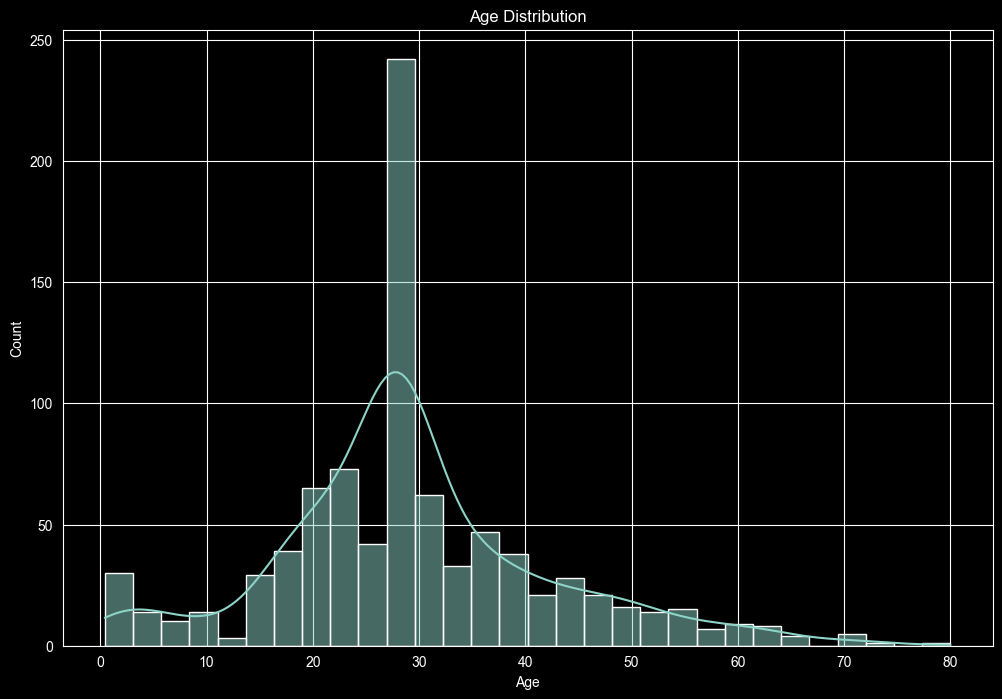

In [354]:
# Distribution of 'Age' feature
plt.figure(figsize=(12, 8))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show();

# Age distribution is right-skewed, it means there are younger passengers, but the few older passengers (e.g., passengers in their 60s, 70s) cause the tail to stretch to the right.
# Right-skewed distributions are typically associated with Exponential Distribution as they all have long right tails.

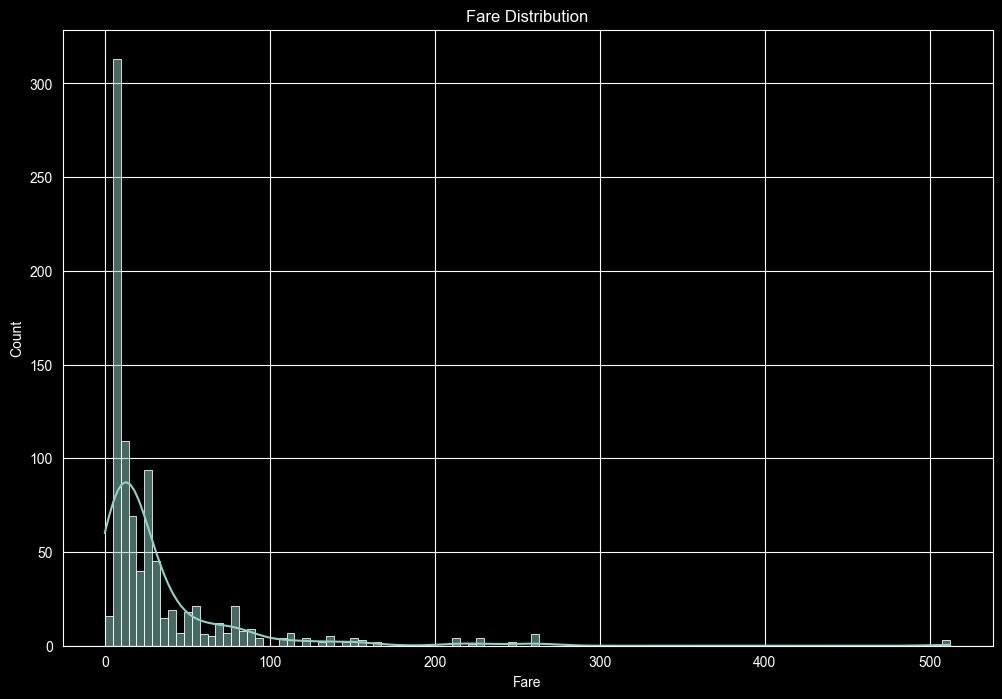

In [355]:
# Distribution of 'Fare' feature
plt.figure(figsize=(12, 8))
sns.histplot(data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

# Fare distribution is right-skewed, indicating that most passengers paid lower fares, with a few passengers paying much higher fares. 
# The right tail of the distribution is stretched due to a small number of high-paying passengers (typically first-class passengers). 
# This type of distribution is often associated with a **Log-Normal Distribution**, as it shows a concentration of values on the left with a long right tail.

### Visualizing Categorical Features

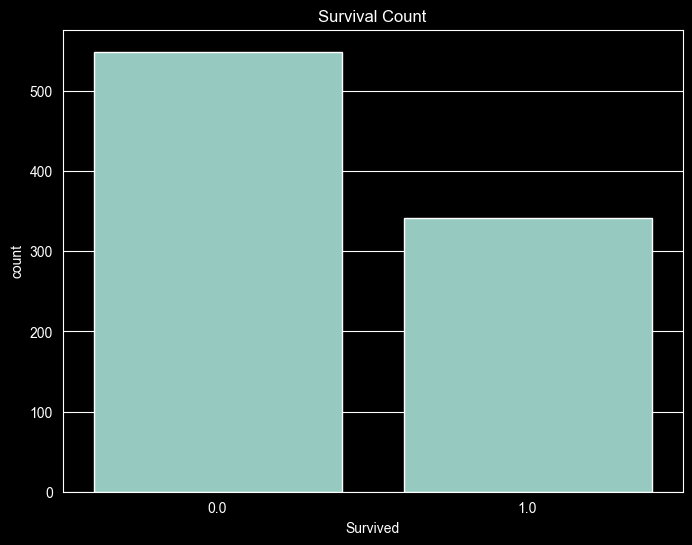

In [356]:
# Count plot for survival
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()

# The count plot shows the distribution of survival (0 = did not survive, 1 = survived). 
# It helps visualize the number of passengers who survived versus those who did not. 
# Based on the plot, we can observe whether the dataset is imbalanced, with a significantly higher or lower number of survivors.


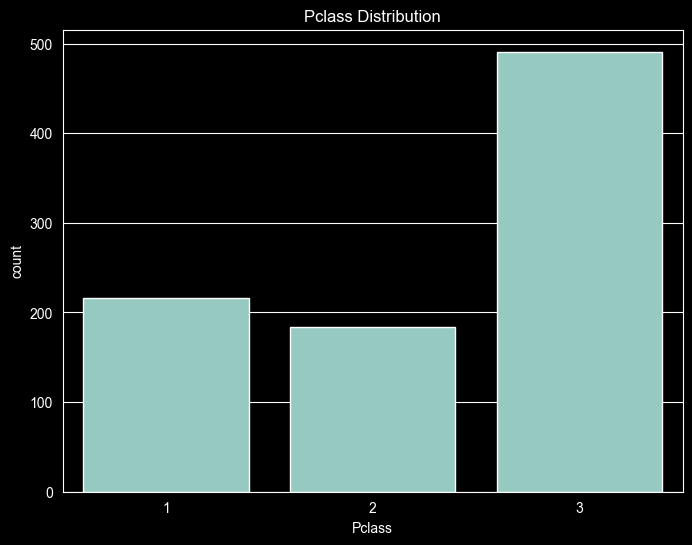

In [357]:
# Countplot for 'Pclass'
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data)
plt.title('Pclass Distribution')
plt.show()

# The count plot shows the distribution of passengers across the three classes: 1st class, 2nd class, and 3rd class.
# This plot helps us understand how passengers are distributed across different ticket classes. 
# Most passengers are from 3rd class, followed by 2nd and 1st class. 
# This distribution could be important for survival prediction as higher-class passengers generally had higher survival rates.

## Step 6: Bivariate Analysis (Relationship between two variables)

In [358]:
# Drop non-numeric columns that aren’t useful
data = data.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

### Correlation Heatmap

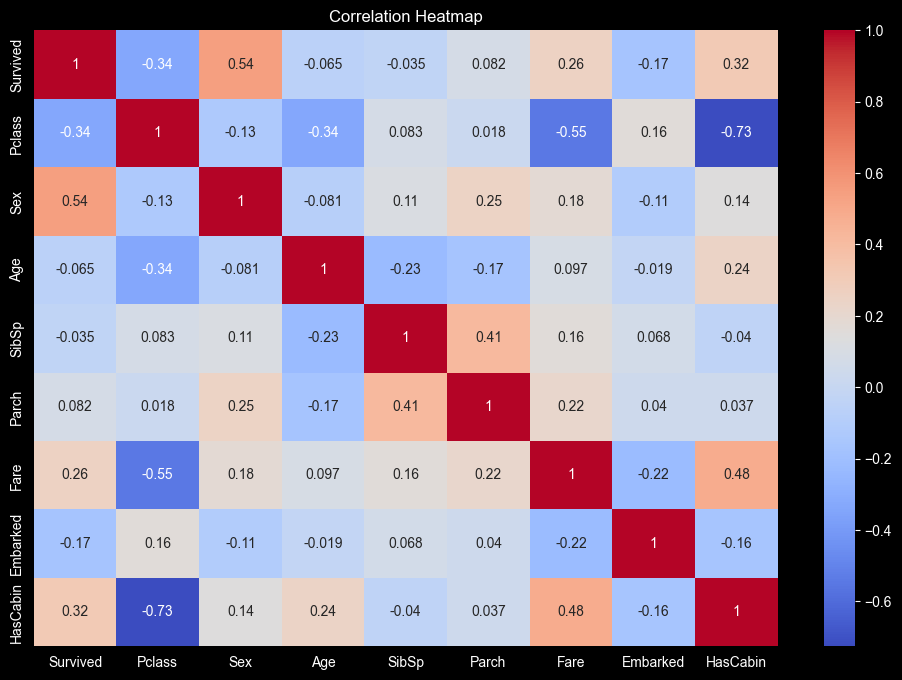

In [359]:
# 🧠 Correlation Heatmap for Numerical Features
# ------------------------------------------------------------
# ✅ Goal: Visualize how strongly numeric features are linearly related to each other.
# This helps in understanding the structure of the data and spotting important patterns.

# Step 1: Calculate pairwise correlation between all numeric columns
# ------------------------------------------------------------
# The correlation matrix (corr) contains values between:
#   - +1: Strong positive correlation (both features increase together)
#   - 0: No correlation
#   - -1: Strong negative correlation (one increases, the other decreases)
corr = data.corr()

# Step 2: Plot the heatmap
# ------------------------------------------------------------
# A heatmap is a colored grid that shows the correlation matrix visually.
# 'annot=True' will print correlation values inside each cell.
# 'cmap="coolwarm"' uses blue for negative, red for positive correlations.
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# 🔍 Why is this heatmap useful?

# 1. Feature Selection:
#    You can spot which features are **strongly correlated with 'Survived'**, like:
#      - 'Fare' might have a positive correlation (wealthier people survived more).
#      - 'Pclass' might have a negative correlation (lower class → lower survival).
#    These features are likely **important predictors** and should be kept for modeling.

# 2. Multicollinearity Check:
#    If two independent variables (like 'Fare' and 'Pclass') are **too strongly correlated**,
#    one of them may be **redundant** in the model.
#    You might consider removing one to reduce overfitting.

# 3. Hypothesis Testing:
#      - Does high fare relate to survival?
#      - Does age matter more than sex?

# 4. Model Performance:
#    Models like Logistic Regression or Linear Regression work better
#    when highly correlated or irrelevant features are removed.


# - This correlation only captures **linear** relationships.
# - It doesn’t work well for categorical features like 'Sex', 'Embarked' until they are encoded.

### Survival by 'Pclass'

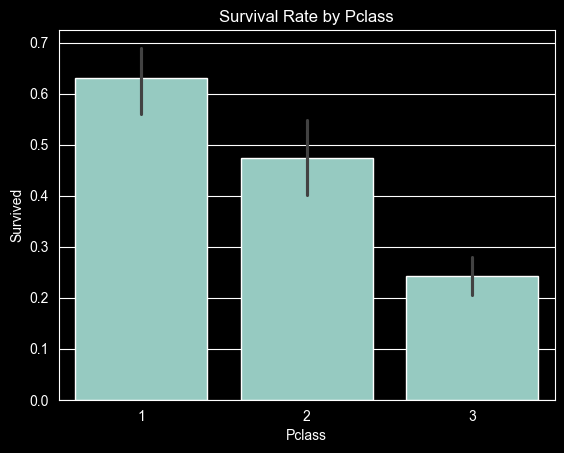

In [360]:
# Bar plot for survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Pclass')
plt.show()

# We visualize the survival rate by Pclass to understand how passenger class affected chances of survival.
# Higher class (1st) passengers had better cabins and quicker access to lifeboats,
# while 3rd class passengers had lower survival rates due to location and limited access.

### Survival by 'Sex'

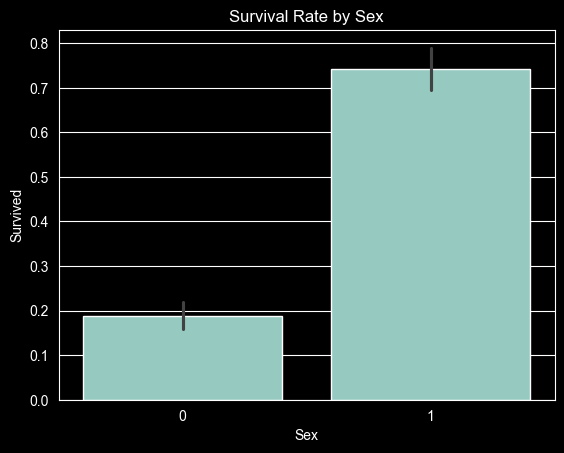

In [361]:
# Bar plot for survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()

# This bar plot shows how gender affected survival chances.
# Women had a significantly higher survival rate than men,
# likely due to the "women and children first" evacuation protocol followed during the disaster.

### Survival by 'Embarked'

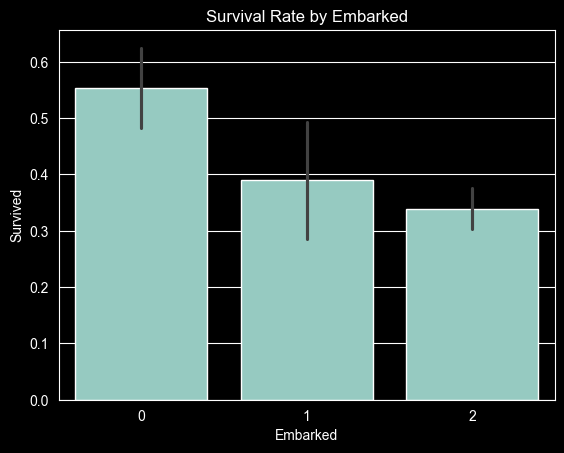

In [362]:
# Bar plot for survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=data)
plt.title('Survival Rate by Embarked')
plt.show()
# This plot helps us understand if the port of embarkation had any impact on survival rates.
# Passengers who boarded from 'C' (Cherbourg) had higher survival rates,
# possibly because more 1st class passengers boarded there compared to other ports like 'S' (Southampton) or 'Q' (Queenstown).


## Step 7: Multivariate Analysis

### Pairplot for Numerical Features

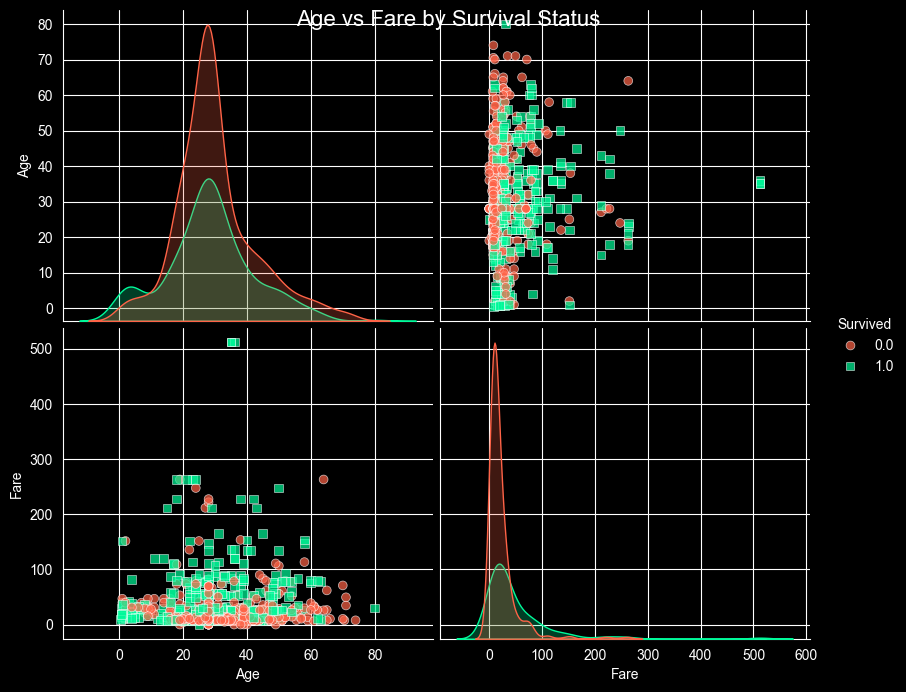

In [363]:
# Pair plot to see interactions between 'Age', 'Fare', and 'Survived'
plt.style.use('dark_background')
sns.pairplot(
    data[['Age', 'Fare', 'Survived']],  # Selecting the columns
    hue='Survived',  # Color points by survival status
    palette={0: '#FF6347', 1: '#00FA9A'},  # Red for Not Survived, Mint Green for Survived
    height=3.5,   # Controls individual plot size
    aspect=1.2,   # Controls width ratio
    plot_kws={'s': 40, 'alpha': 0.7},  # Scatter plot point size and transparency
    diag_kind='kde',  # Use Kernel Density Estimate (KDE) for the diagonal histograms
    markers=["o", "s"],  # Use different markers for different classes (circle, square)
)
plt.suptitle("Age vs Fare by Survival Status", color='white', fontsize=16)
plt.show()

# This pairplot visualizes the relationships between 'Age', 'Fare', and 'Survived'.
# It helps us spot patterns, such as whether younger or higher-paying passengers had better survival chances.
# Useful for detecting clusters, trends, or outliers that may influence model predictions.

### Count plot for 'Pclass' and 'Survived'

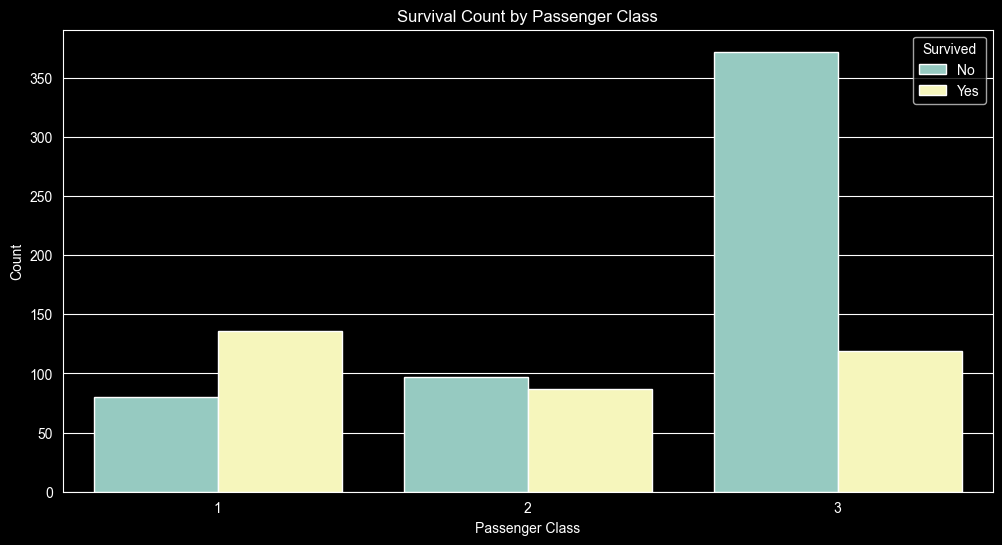

In [364]:
# Count plot to visualize survival count across different Passenger Classes (Pclass)
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="Pclass", hue="Survived", palette="Set3")
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

# This countplot helps us visualize how survival rates varied across different passenger classes.
# By using the hue parameter, we can easily compare the number of survivors vs non-survivors for each class (1st, 2nd, 3rd).
# It also provides insights into the distribution of survival within each class, showing that higher-class passengers had better survival rates.
# This kind of visualization helps us identify trends that might be useful when building predictive models.

## Step 8: Feature Engineering

In [365]:
# Creating a new feature 'FamilySize'
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Creating a binary feature 'IsAlone' using .loc to assign the values directly
data.loc[data['FamilySize'] > 1, 'IsAlone'] = 0  # Passengers with family, not alone
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1  # Passengers traveling alone

# Binning 'Age' into categories
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teenager', 'Adult', 'Senior', 'Elderly']
data['AgeCategory'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Displaying the updated DataFrame
data[['FamilySize', 'IsAlone', 'AgeCategory']].head(15)

# Feature Engineering:
# 'FamilySize' combines 'SibSp' and 'Parch' to represent the total family size aboard. Larger families could have had less chance of survival due to the difficulty in managing emergency situations, while those traveling alone may have had more immediate access to lifeboats.
# 'IsAlone' is a binary feature indicating if a passenger was alone (1) or with family (0). It captures the potential impact of social support on survival chances.
# 'AgeCategory' groups passengers into age categories ('Child', 'Teenager', 'Adult', 'Senior', 'Elderly'), as age could have influenced priority for lifeboat access, helping the model understand survival trends across age groups.
# These features (FamilySize, IsAlone, AgeCategory) provide valuable insights into passengers' survival chances based on family dynamics and age, enhancing model prediction.

,FamilySize,IsAlone,AgeCategory
0,2,0.0,Adult
1,2,0.0,Senior
2,1,1.0,Adult
3,2,0.0,Senior
4,1,1.0,Senior
5,1,1.0,Adult
6,1,1.0,Senior
7,5,0.0,Child
8,3,0.0,Adult
9,2,0.0,Teenager


## Step 9: Visualizing Relationships

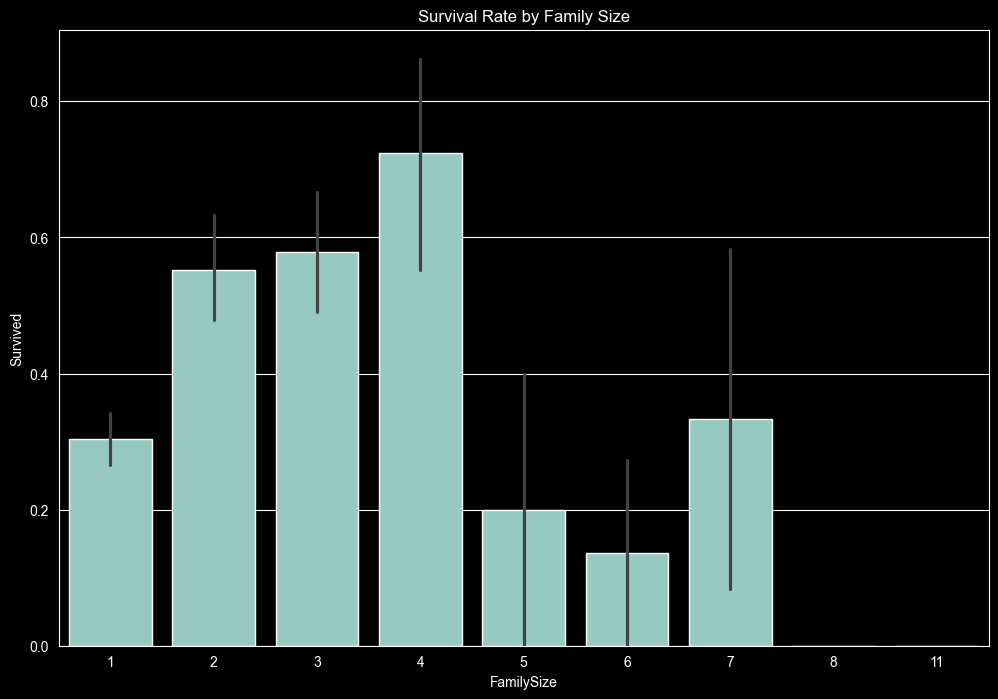

In [366]:
# Bar plot for survival rate by family size
plt.figure(figsize=(12, 8))
sns.barplot(x='FamilySize', y='Survived', data=data)
plt.title('Survival Rate by Family Size')
plt.show()
# Bar plot to visualize the survival rate across different family sizes
# The x-axis represents 'FamilySize', which shows the number of people a passenger traveled with (including themselves).
# The y-axis represents the survival rate ('Survived'), indicating the proportion of passengers who survived.
# This plot helps us understand if passengers traveling with larger or smaller families had different survival chances.
# For example, it's possible that passengers traveling alone or with smaller families had different survival rates compared to those traveling with larger families.
# The plot can provide insights into the role of family size in survival probability.

### Age vs. Survival

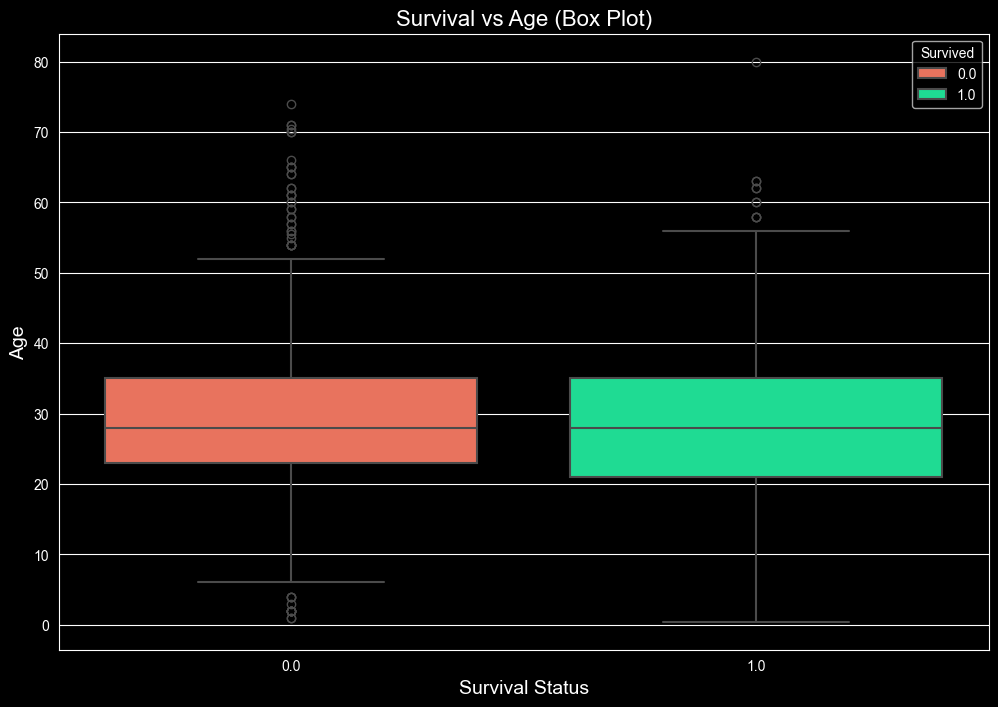

In [367]:
# Boxplot to visualize the distribution of Age based on survival status
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='Survived', 
    y='Age', 
    data=data,
    hue="Survived",
    palette={0.0: '#FF6347', 1.0: '#00FA9A'},  # Red for Not Survived, Mint Green for Survived
    linewidth=1.5,  # Makes the plot lines a bit thicker for clarity
)

# Title for the plot with color
plt.title('Survival vs Age (Box Plot)', fontsize=16, color='white')

# Add labels for axes
plt.xlabel('Survival Status', fontsize=14, color='white')
plt.ylabel('Age', fontsize=14, color='white')

# Display the plot
plt.show()

# This box plot shows the distribution of age for passengers who survived (Survived = 1) and those who did not (Survived = 0).
# The color contrast between red (not survived) and mint green (survived) highlights the difference in survival rates.
# The plot shows the median age, the interquartile range (IQR), and any outliers, providing a clear visual representation of the age distribution.

### Fare vs. Survival

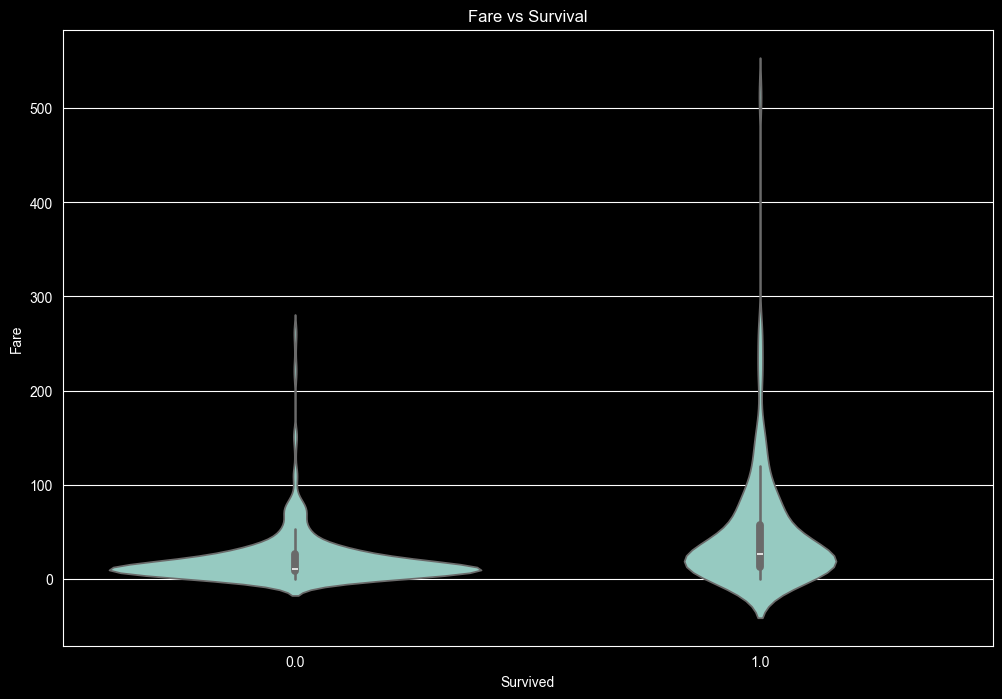

In [368]:
# Violin plot to visualize the distribution of Fare based on survival status
plt.figure(figsize=(12, 8))
sns.violinplot(x='Survived', y='Fare', data=data)

# Title for the plot
plt.title('Fare vs Survival')

# Display the plot
plt.show()

# This violin plot displays the distribution of the Fare variable for passengers who survived (Survived = 1) 
# and those who did not (Survived = 0).
# The width of the violin represents the density of passengers at different fare ranges, 
# revealing the spread and concentration of fares for both groups.
# A larger width in certain fare ranges may indicate that more passengers in that range either survived or did not survive.
# The plot helps to identify how fare might have influenced survival chances, as passengers with higher fares could show a distinct pattern.

## Step 10: Conclusions

- **Age & Fare**: Younger passengers and those paying higher fares had higher survival rates.
- **Family Size**: Solo travelers had different survival chances than those with families.
- **Passenger Class**: Higher-class passengers had better survival rates.

## Step 11:  Data Insights

#### Women had a higher survival rate than men.
#### First-class passengers had higher survival rates compared to third-class passengers.
#### Younger passengers (children) had a higher survival rate compared to adults and seniors.

# Step 12: Machine Learning Model Creation  

### Import a Machine Learning (ML) library from scikit-learn

In [369]:
# For preprocessing: scaling numerical data
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# To apply transformations to specific columns
from sklearn.compose import ColumnTransformer

# To chain preprocessing and modeling into one pipeline
from sklearn.pipeline import make_pipeline

# Random Forest Classifier as our first model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# For evaluating model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [370]:
# DROP This 2 filed because already make FamilySize Column form them
data.drop(columns=['SibSp', 'Parch'], inplace=True, axis=1)

In [371]:
# Visualize a few rows for a finale step of ML
print(data.head())

   Survived Pclass  Sex   Age     Fare  Embarked  HasCabin  FamilySize  \
0       0.0      3    0  22.0   7.2500         2         0           2   
1       1.0      1    1  38.0  71.2833         0         1           2   
2       1.0      3    1  26.0   7.9250         2         0           1   
3       1.0      1    1  35.0  53.1000         2         1           2   
4       0.0      3    0  35.0   8.0500         2         0           1   

   IsAlone AgeCategory  
0      0.0       Adult  
1      0.0      Senior  
2      1.0       Adult  
3      0.0      Senior  
4      1.0      Senior  


### Prepare Features and Target Variable

In [377]:
# This is our Features. So We must remove our Target from the feature 
X = data.drop('Survived', axis=1)
y = data['Survived']
# Look at the shape for Target and Feature
print(X.shape)
print(y.shape)

(891, 9)
(891,)


### Identify Feature Types

In [378]:
# Define features
numerical_features = ['Pclass', 'Age', 'Fare', 'FamilySize']
ordinal_features = ['AgeCategory']

### Create Preprocessing Pipelines

In [379]:
# Define transformers
numerical_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder()

# Create the preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ],
    remainder='passthrough',
    force_int_remainder_cols=False,
    verbose_feature_names_out=False
)

### Create the Machine Learning Pipeline Using make_pipeline

In [380]:
# Full pipeline: preprocessing + model using make_pipeline
clf = make_pipeline(
    preprocessor,
    RandomForestClassifier(n_estimators=100),
)

# Train the Model on Training Data

In [381]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [382]:
clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Pclass', 'Age', 'Fare',
                                                   'FamilySize']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['AgeCategory'])],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier', RandomForestClassifier())])

# Step 13: Evaluate the Model on Test Data

In [393]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on validation
y_val_pred = clf.predict(X_val)

# Evaluation
print("Accuracy:", round(accuracy_score(y_val, y_val_pred), 2))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.84      0.83       105
         1.0       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



### Visualize the Confusion matrix in heatmap

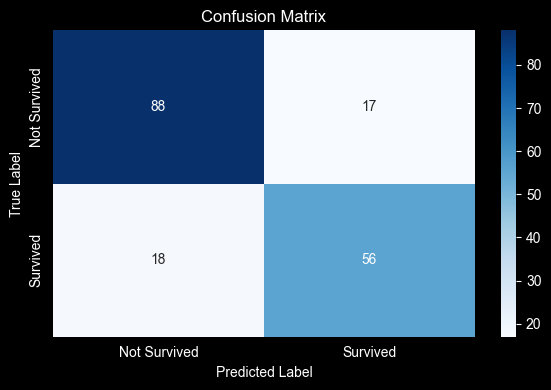

In [394]:
cm = confusion_matrix(y_val, y_val_pred)
# Optional: Set labels
labels = ['Not Survived', 'Survived']
# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [395]:
# What they mean:
# True Negatives (TN = 88): Model predicted Not Survived, and person really didn’t survive (correct)
# False Positives (FP = 17): Model predicted Survived, but person actually did not survive (wrong)
# False Negatives (FN = 18): Model predicted Not Survived, but person actually did survive (wrong)
# True Positives (TP = 56): Model predicted Survived, and person really did survive (correct)

### Tune Hyperparameters with GridSearchCV

In [396]:
# Import Library
from sklearn.model_selection import GridSearchCV

In [417]:
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 5, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(
    clf,
    param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
)
grid_search.fit(X_train, y_train)
print("Best parameters set found on development set:")
print("Best Params:", grid_search.best_params_)
print("Best Score:", round(grid_search.best_score_, 2))

Best parameters set found on development set:
Best Params: {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}
Best Score: 0.83


### Print Validation Accuracy (Best Model)

In [406]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the validation set
y_val_pred = best_model.predict(X_val)

# Calculate accuracy
acc = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy (Best Model):", round(acc, 3))

Validation Accuracy (Best Model): 0.804


### Visualize Confusion matrix again, which works best

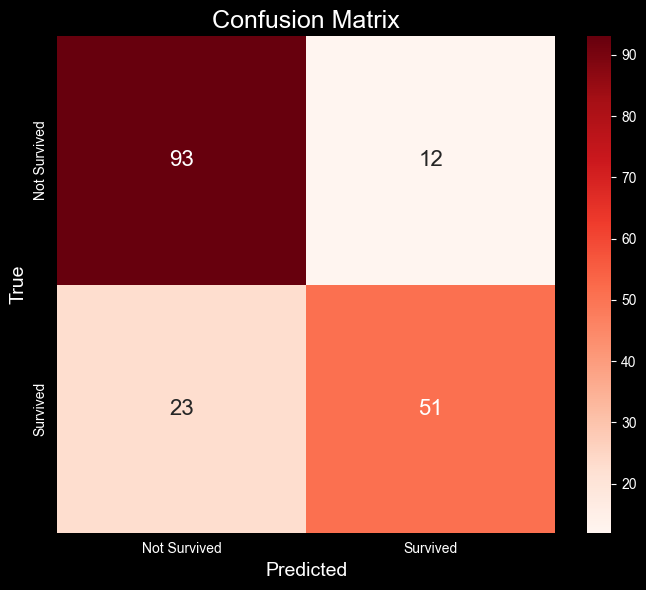

In [416]:
# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Labels for the confusion matrix
labels = ['Not Survived', 'Survived']

# Create heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=True,         # Annotate the heatmap with numbers
    fmt='d',            # Format as integers
    cmap='Reds',        # Red color palette
    xticklabels=labels, 
    yticklabels=labels, 
    cbar=True,         # Turn off the color bar, False for Stop showing Color bar at right
    annot_kws={"size": 16},  # Customize annotation size
)

# Title and labels for clarity
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Communication of Results

### **Objective:**  
Our goal was to improve the model's accuracy by finding the best hyperparameters for the Random Forest classifier.  

### **Approach:**  
- Tested different hyperparameter combinations using **10-fold cross-validation**  
- Evaluated best model on a separate **validation set**  

### **Key Findings:**  

#### **Best Model Configuration:**  
- **Number of Trees:** 200  
- **Max Tree Depth:** 5 *(limits complexity to prevent overfitting)*  
- **Minimum Samples per Split:** 2 *(allows finer splits when beneficial)*  

#### **Performance Metrics:**  
| Metric                     | Score  |
|----------------------------|--------|
| Cross-Validation Accuracy   | 83%    |
| Validation Set Accuracy     | 80.4%  |

#### **Interpretation:**  
- Model generalizes well to unseen data (~2.6% accuracy drop)  
- Hyperparameters balance model complexity and generalization     